Basic steps we needs to follow here to do audio classification

1) Read the dataset and understand and explore it
2) Data audio preprocessing i.e Taking out independent and dependent features
3) Need to divide these features in training and testing set
4) Apply ML algo and get the classification result

In [1]:
!pip install librosa 
!pip install IPython
!pip install streamlit

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa
import IPython.display as ipd
import librosa.display

In [34]:
sample_path='./Data/genres_original/classical/classical.00004.wav'
path_check='E:/Personal_use/Personal_Projects/Music_genre_classifcation/Data/genres_original/classical/classical.00004.wav'
path_check2='E:/Personal_use/Personal_Projects/Music_genre_classifcation/Data/genres_original/blues/blues.00004.wav'

In [35]:
sample_sound,sr=librosa.load(path_check2)

In [9]:
sample_sound

array([-0.01077271, -0.02001953, -0.02426147, ..., -0.10516357,
       -0.11056519, -0.09179688], dtype=float32)

In [10]:
len(sample_sound)

661794

Display the sample audio file

30.013333333333332


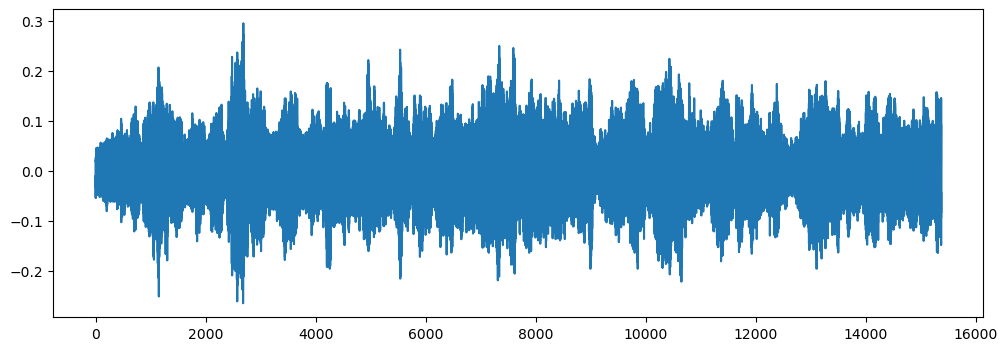

In [13]:
#Displaying the waveform
plt.figure(figsize=(12,4))
data,sr=librosa.load(sample_path)
duration = librosa.get_duration(y=data)
time=librosa.times_like(data,sr=sr)
plt.plot(time,data)
ipd.Audio(sample_path)
print(duration)

In [8]:
librosa.__version__

'0.10.0.post2'

In [36]:
metadata=pd.read_csv("./Data/features_30_sec.csv")
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [67]:
metadata.shape

(1000, 60)

In [15]:
duration=len(data)/sr

In [16]:
time = np.linspace(0, duration, len(data))
print(time)

[0.00000000e+00 4.53515425e-05 9.07030849e-05 ... 3.00132426e+01
 3.00132880e+01 3.00133333e+01]


In [17]:
len(time)

661794

In [18]:
sr

22050

In [19]:
sr*4

88200

In [20]:
#creation of spectrogram 
spectrogram=librosa.amplitude_to_db(np.abs(librosa.stft(data)),ref=np.max)

In [21]:
print(spectrogram)
len(spectrogram[0])

[[-44.58604  -44.33732  -45.87007  ... -47.22672  -36.120445 -47.23359 ]
 [-41.89861  -48.525406 -40.50216  ... -43.729485 -34.076447 -35.62728 ]
 [-36.80914  -36.345184 -37.821487 ... -40.990402 -33.001812 -32.200195]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -68.590164]
 [-80.       -80.       -80.       ... -80.       -80.       -68.63463 ]
 [-80.       -80.       -80.       ... -80.       -80.       -68.68953 ]]


1293

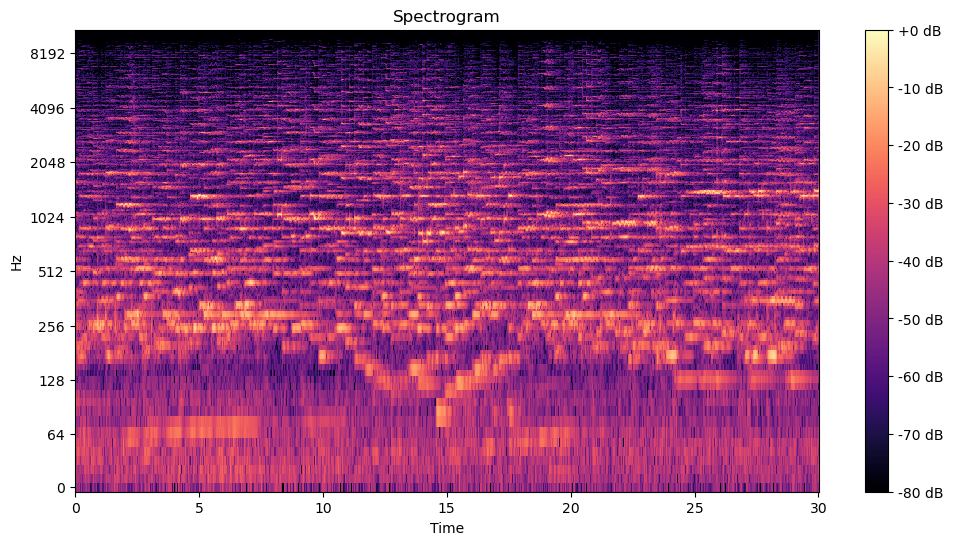

In [22]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram,sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [23]:
#The df we can see is name of the file and class is only useful column but name is not sufficient to get the features of audio
#we need to get the understand the music pattern and for that we are using MFCC which is used for features extraction
#lets try it for single audio file

mfccs=librosa.feature.mfcc(y=sample_sound,sr=sr,n_mfcc=40)
mfccs.shape

(40, 1293)

In [54]:
import os
import soundfile as sf
audio_dataset_path="./Data/genres_original/"

In [78]:
#we need to create a feature extraction functions as we just need to apply mfcc to each audio data,
#now the input given into mfcc is librosa load file but librosa load file need the path to use librosa.load(file_path), 
#so we need to fetch file path also
def feature_extractor(path_finder):
    try:
        # Load the audio file and get its sample rate.
        audio_file, sr = librosa.load(path_finder)

        # Calculate the MFCC features.
        mfcc_features = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=40)

        # Average the MFCC coefficients across all frames.
        mfcc_scaled_features = np.mean(mfcc_features.T, axis=0)

        return mfcc_scaled_features
    except Exception as e:
        print(f"Error encountered while processing file: {path_finder}")
        print(e)
        return None


In [ ]:
path_example="./Data/genres_original/blues/blues.00000.wav"
#file name in column is blues.00000.wav
#label is blues 

In [79]:
Extracted_features=[]
for index,row in metadata.iterrows():
    path_finder=os.path.join(os.path.abspath(audio_dataset_path),str(row["label"]),str(row["filename"]))
    #print(type(path_finder))
    path_finder = path_finder.replace('\\', '/')
    #print(path_finder)
    class_name=row['label']
    X_Data=feature_extractor(path_finder)
    if X_Data is not None:
        Extracted_features.append([X_Data,class_name])
    else:
        continue

C:\Users\rojin\AppData\Local\Temp\ipykernel_43352\2643881786.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_file, sr = librosa.load(path_finder)


Error encountered while processing file: E:/Personal_use/Personal_Projects/Music_genre_classifcation/Data/genres_original/jazz/jazz.00054.wav



In [80]:
extracted_features_df=pd.DataFrame(Extracted_features,columns=['feature','Genre'])
extracted_features_df.head()

,feature,Genre
0,"[-113.59882, 121.57067, -19.162262, 42.363937,...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686691,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.209496, -35.581394, 22.139256...",blues


In [81]:
extracted_features_df.shape

(999, 2)

In [88]:
Class_name_list=extracted_features_df['Genre'].unique().tolist()
Class_name_list

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [89]:
name_list=sorted(Class_name_list)
print(name_list)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [92]:
#spliting the dataset into dependent and independentfeatures
X=np.array(extracted_features_df['feature'].tolist())
#y=np.array(extracted_features_df['class'].tolist())
y_old=np.array(extracted_features_df['Genre'].tolist())

In [93]:
#extracted_features_df['class'][500]
y_old

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blu

In [95]:
#label encoding for classes
y=pd.get_dummies(extracted_features_df['Genre'],columns=Class_name_list)
y=y.values

In [118]:
 X.shape

(999, 40)

In [103]:
y.shape

(999, 10)

In [105]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [106]:
#Train test split from Sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [107]:
X_train

array([[ 2.6653410e+01,  7.9789711e+01, -5.2055866e+01, ...,
        -1.4430333e+00, -1.2734199e+00, -5.9081392e+00],
       [-1.4495711e+02,  1.1846496e+02,  2.0525068e+01, ...,
         1.8998555e+00, -1.8821739e+00, -1.8517891e+00],
       [-6.6108925e+01,  9.7883812e+01, -1.8831675e+01, ...,
        -1.2424636e+00, -6.3691193e-01, -1.3383397e+00],
       ...,
       [-7.7426697e+01,  1.3087869e+02, -2.3275221e+01, ...,
        -4.2062173e+00, -3.5183537e+00,  2.6050334e+00],
       [-1.9040649e+02,  1.2951292e+02, -7.8296251e+00, ...,
        -2.2419319e+00, -3.9879441e+00, -1.9877433e+00],
       [-4.6609550e+01,  8.6802017e+01, -3.4776672e+01, ...,
         1.4676014e-01,  9.2151529e-01, -8.7239444e-01]], dtype=float32)

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(799, 40)
(200, 40)
(799, 10)
(200, 10)


In [109]:
#Model preparation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [110]:
class_size=y.shape[1]
model=Sequential()
#First layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#2nd layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#3rd layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(class_size))
model.add(Activation('softmax'))

In [111]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [112]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [115]:
#Model training
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
batch_size=32
start=datetime.now()
# Define the ModelCheckpoint callback
checkpointer = ModelCheckpoint(filepath='best_model.h5', save_best_only=True)

In [116]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer],verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 25.9974 - accuracy: 0.1151 - val_loss: 3.8542 - val_accuracy: 0.1550
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 11.3726 - accuracy: 0.1227 - val_loss: 2.1579 - val_accuracy: 0.2700
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 6.6681 - accuracy: 0.1327 - val_loss: 2.1526 - val_accuracy: 0.2200
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 5.0297 - accuracy: 0.1439 - val_loss: 2.1784 - val_accuracy: 0.2050
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 3.9384 - accuracy: 0.1702 - val_loss: 2.1997 - val_accuracy: 0.2100
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 3.4969 - accuracy: 0.1690 - val_loss: 2.1875 - val_accuracy: 0.2350
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 3.1422 - accuracy: 0.1677 - val_loss: 2.2034 - val_accuracy: 0.2300
Epoch 8/10

Epoch 59/100
25/25 [==============================] - 0s 7ms/step - loss: 1.7204 - accuracy: 0.3767 - val_loss: 1.6456 - val_accuracy: 0.4400
Epoch 60/100
25/25 [==============================] - 0s 7ms/step - loss: 1.6793 - accuracy: 0.3867 - val_loss: 1.6381 - val_accuracy: 0.4500
Epoch 61/100
25/25 [==============================] - 0s 5ms/step - loss: 1.6820 - accuracy: 0.3504 - val_loss: 1.6440 - val_accuracy: 0.4450
Epoch 62/100
25/25 [==============================] - 0s 6ms/step - loss: 1.6913 - accuracy: 0.3767 - val_loss: 1.6523 - val_accuracy: 0.4550
Epoch 63/100
25/25 [==============================] - 0s 7ms/step - loss: 1.6561 - accuracy: 0.3855 - val_loss: 1.6373 - val_accuracy: 0.4700
Epoch 64/100
25/25 [==============================] - 0s 6ms/step - loss: 1.6578 - accuracy: 0.3992 - val_loss: 1.6110 - val_accuracy: 0.4650
Epoch 65/100
25/25 [==============================] - 0s 6ms/step - loss: 1.6168 - accuracy: 0.3967 - val_loss: 1.6132 - val_accuracy: 0.4650
Epoch 

In [117]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.5450000166893005
